Goal: regular experiments with 3 factors
===========================================

Achieve a stability value of 50 days or more, for a new product.

Data avaialble:

* **A**: enzyme strength  [numeric factor]
* **B**: feed concentration [numeric factor]
* **C**: mixer type [categorical factor]
* *y* = Stability [days]

In [1]:
from process_improve import *

In [6]:
A = B = C = c(-1, +1)
A, B, C = expand_grid(A=A, B=B, C=C)
    
A.name = "Enzyme strength"
B.name = "Feed concentration"
C.name = "Mixer type"

# Response: stability value
y = c(40, 27, 35, 21, 41, 27, 31, 20, name="Stability", units="days")
    
# Linear model using all factors to predict the response
expt = gather(A=A, B=B, C=C, y=y, title='Experiments to determine stability value')
expt

,A,B,C,y
0,-1.0,-1.0,-1.0,40.0
1,1.0,-1.0,-1.0,27.0
2,-1.0,1.0,-1.0,35.0
3,1.0,1.0,-1.0,21.0
4,-1.0,-1.0,1.0,41.0
5,1.0,-1.0,1.0,27.0
6,-1.0,1.0,1.0,31.0
7,1.0,1.0,1.0,20.0


In [8]:
model_stability = lm("y ~ A*B*C", expt)
summary(model_stability);

       OLS Regression Results: Experiments to determine stability value       
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                nan
Time:                        10:48:19   Log-Likelihood:                 246.08
No. Observations:                   8   AIC:                            -476.2
Df Residuals:                       0   BIC:                            -475.5
Residual std error                ---                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2500        inf          0        nan         nan         nan
A             -6.5000        inf         -0        n

Interpretation of the model 
----------------------------------------

The model shows:

* An $R^2$ value of ____
* The factors which have the greatest influence on the product's stability are:
 1. ___
 2. ___, then finally 
 3. ___


Use contour plots of all combinations (A and B, A and C, B and C) to verify which factor has the least influence on the stability. Does your visual conclusion in the contour plot match your conclusion from the linear regression model summary? Does it match the  bar magnitudes in the Pareto plot?


* Coefficient **S** has a value of _____, which shows that sales ______ (increase/decrease)  by €13 for every € ____ increase in the free-shipping threshold, keeping all other factors constant.
* Coefficient **P** has a value of _____, which shows that sales ______ (increase/decrease)  by ____ if ______________________, keeping all other factors constant.




In [12]:
# Contour plots: this code is temporarily not working
# contour_plot(model_stability, "A", "B", dpi=80);
# contour_plot(model_stability, "A", "C", dpi=80);
# contour_plot(model_stability, "B", "C", dpi=80);

Model without the unimportant factor(s)
---------------------------------------

Remove factor C from consideration. Why?

In [18]:
expt_no_C = gather(A=A, B=B, y=y, title='Experiments to determine stability value: A and B only')
model_stability_no_C = lm("y ~ A*B", expt_no_C)
summary(model_stability_no_C);

OLS Regression Results: Experiments to determine stability value: A and B only
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     64.67
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           0.000760
Time:                        10:56:38   Log-Likelihood:                -11.823
No. Observations:                   8   AIC:                             31.65
Df Residuals:                       4   BIC:                             31.96
Residual std error              1.500                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2500      0.530     57.040      0.000      28.778      31.722
A             -6.5000      0.530    -12.257      0.0

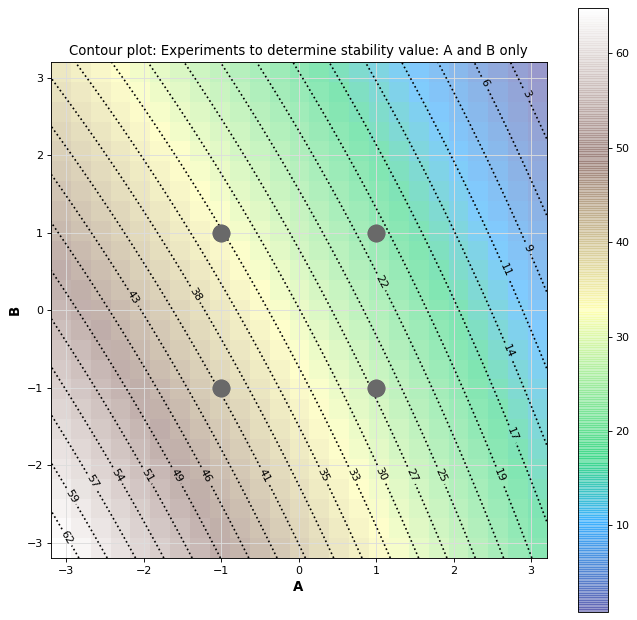

In [27]:
contour_plot(model_stability_no_C, xlabel="A", ylabel="B", dpi=80);

In [28]:
models.predict(model_stability_no_C, A=-2, B=-2)

0    51.25
dtype: float64